In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ladvi\Downloads\hospital data analysis.csv")

In [3]:
df

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4
...,...,...,...,...,...,...,...,...,...,...
979,996,68,Male,Hypertension,Medication and Counseling,1000,70,No,Stable,4
980,997,45,Female,Appendicitis,Appendectomy,8000,72,No,Recovered,3
981,998,40,Male,Fractured Leg,Cast and Physical Therapy,3000,72,No,Recovered,4
982,999,78,Female,Heart Attack,Cardiac Catheterization,18000,74,Yes,Stable,2


# How many patients are there?

In [4]:
df.nunique()

Patient_ID        984
Age                22
Gender              2
Condition          15
Procedure          15
Cost               15
Length_of_Stay     76
Readmission         2
Outcome             2
Satisfaction        4
dtype: int64

# How many unique diseases and unique treatments?

In [5]:
df['Condition'].nunique()

15

In [6]:
df['Procedure'].nunique()

15

# Which columns are categorical vs numerical?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_ID      984 non-null    int64 
 1   Age             984 non-null    int64 
 2   Gender          984 non-null    object
 3   Condition       984 non-null    object
 4   Procedure       984 non-null    object
 5   Cost            984 non-null    int64 
 6   Length_of_Stay  984 non-null    int64 
 7   Readmission     984 non-null    object
 8   Outcome         984 non-null    object
 9   Satisfaction    984 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 77.0+ KB


In [8]:
df.dtypes

Patient_ID         int64
Age                int64
Gender            object
Condition         object
Procedure         object
Cost               int64
Length_of_Stay     int64
Readmission       object
Outcome           object
Satisfaction       int64
dtype: object

# What percentage of patients have missing values per column?

In [9]:
(df.isna().mean()*100).round(2)

Patient_ID        0.0
Age               0.0
Gender            0.0
Condition         0.0
Procedure         0.0
Cost              0.0
Length_of_Stay    0.0
Readmission       0.0
Outcome           0.0
Satisfaction      0.0
dtype: float64

# Are there duplicate patient records? If yes, how many?

In [10]:
df.duplicated(subset='Patient_ID').sum()

np.int64(0)

# Age distribution — is it skewed or normal?

In [11]:
df.head()

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4


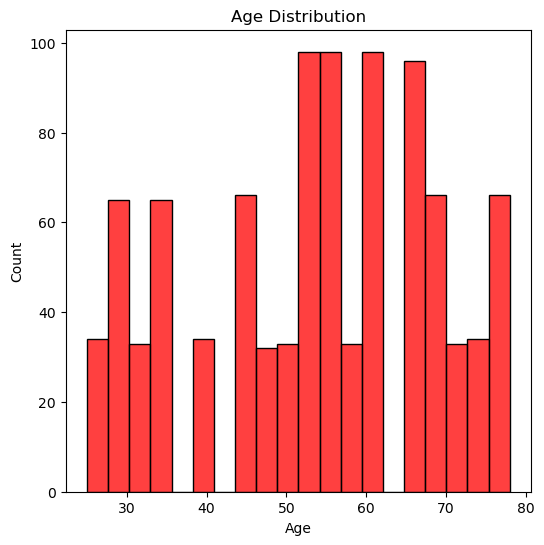

In [12]:
plt.figure(figsize=(6,6))
sns.histplot(data=df,x='Age',bins=20,color="red")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

In [13]:
df['Age'].describe()

count    984.000000
mean      53.754065
std       14.941135
min       25.000000
25%       45.000000
50%       55.000000
75%       65.000000
max       78.000000
Name: Age, dtype: float64

# Gender count — is the dataset balanced?

In [14]:
df['Gender'].value_counts(normalize=True)*100

Gender
Female    53.252033
Male      46.747967
Name: proportion, dtype: float64

In [15]:
df['Gender'].describe()

count        984
unique         2
top       Female
freq         524
Name: Gender, dtype: object

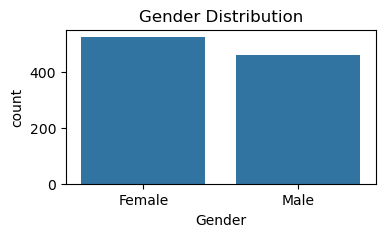

In [16]:
plt.figure(figsize=(4,2))
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()

In [17]:
df['Age_group'] = pd.cut(
    df['Age'],
    bins=[0,18,35,60,100],
    labels=['0-18','19-35','36-60','60+']
)

df['Age_group'].value_counts()

Age_group
36-60    459
60+      328
19-35    197
0-18       0
Name: count, dtype: int64

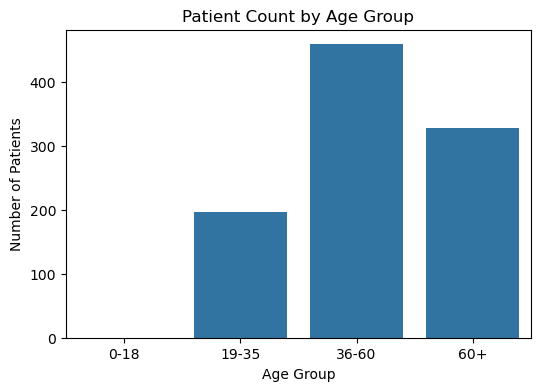

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Age_group')
plt.title('Patient Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.show()


# Top 5 most common diseases

In [19]:
df["Condition"].value_counts().sort_values(ascending=False).head(5)

Condition
Fractured Leg    67
Heart Attack     67
Fractured Arm    66
Hypertension     66
Appendicitis     66
Name: count, dtype: int64

In [20]:
df['Condition'].value_counts().head(5)

Condition
Fractured Leg    67
Heart Attack     67
Fractured Arm    66
Hypertension     66
Appendicitis     66
Name: count, dtype: int64

# Top 5 most common treatments

In [21]:
df["Procedure"].value_counts().head(5)

Procedure
Cast and Physical Therapy    67
Cardiac Catheterization      67
X-Ray and Splint             66
Medication and Counseling    66
Appendectomy                 66
Name: count, dtype: int64

# Which disease has the highest average hospital stay?

In [22]:
df.head(5)

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction,Age_group
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4,36-60
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3,36-60
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5,19-35
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2,60+
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4,36-60


In [23]:
df.groupby("Condition")["Length_of_Stay"].mean().sort_values(ascending=False)

Condition
Cancer                   42.651515
Prostate Cancer          41.584615
Heart Attack             41.000000
Stroke                   40.333333
Fractured Leg            39.000000
Heart Disease            38.215385
Osteoarthritis           37.859375
Appendicitis             37.439394
Kidney Stones            36.461538
Diabetes                 36.092308
Childbirth               35.523077
Hypertension             35.515152
Respiratory Infection    34.661538
Fractured Arm            34.257576
Allergic Reaction        34.242424
Name: Length_of_Stay, dtype: float64

# Overall recovery rate (%)

In [24]:
df.head()

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction,Age_group
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4,36-60
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3,36-60
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5,19-35
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2,60+
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4,36-60


In [25]:
df['recovery_status'] = (df['Outcome'] == 'Recovered').astype(int)

In [26]:
df.head()

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction,Age_group,recovery_status
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4,36-60,1
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3,36-60,0
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5,19-35,1
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2,60+,0
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4,36-60,1


In [27]:
df["recovery_status"].mean()*100

np.float64(60.0609756097561)

# Recovery rate by disease

In [28]:
(df.groupby("Condition")['recovery_status'].mean()*100).sort_values(ascending=False)

Condition
Allergic Reaction        100.0
Appendicitis             100.0
Cancer                   100.0
Childbirth               100.0
Fractured Arm            100.0
Fractured Leg            100.0
Heart Disease            100.0
Prostate Cancer          100.0
Kidney Stones            100.0
Diabetes                   0.0
Heart Attack               0.0
Hypertension               0.0
Osteoarthritis             0.0
Respiratory Infection      0.0
Stroke                     0.0
Name: recovery_status, dtype: float64

# Recovery rate by treatment

In [29]:
(df.groupby('Procedure')["recovery_status"].mean()*100).sort_values(ascending=False)

Procedure
Angioplasty                             100.0
Appendectomy                            100.0
Delivery and Postnatal Care             100.0
Cast and Physical Therapy               100.0
Surgery and Chemotherapy                100.0
Lithotripsy                             100.0
Epinephrine Injection                   100.0
X-Ray and Splint                        100.0
Radiation Therapy                       100.0
Antibiotics and Rest                      0.0
Cardiac Catheterization                   0.0
CT Scan and Medication                    0.0
Insulin Therapy                           0.0
Medication and Counseling                 0.0
Physical Therapy and Pain Management      0.0
Name: recovery_status, dtype: float64

# Which treatment has high usage but low recovery? (important)

In [30]:
df.head()

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction,Age_group,recovery_status
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4,36-60,1
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3,36-60,0
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5,19-35,1
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2,60+,0
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4,36-60,1


In [31]:
treatment_summary = df.groupby('Procedure').agg(
    count=('Patient_ID','count'),
    recovery_rate=('recovery_status','mean')
)

treatment_summary.sort_values(['count','recovery_rate'], ascending=[False,True]).head()


,count,recovery_rate
Procedure,,
Cardiac Catheterization,67,0.0
Cast and Physical Therapy,67,1.0
CT Scan and Medication,66,0.0
Medication and Counseling,66,0.0
Appendectomy,66,1.0


# Are older patients recovering slower than younger ones?

In [32]:
df.groupby('Age_group')["recovery_status"].mean()

C:\Users\ladvi\AppData\Local\Temp\ipykernel_25320\3422631800.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_group')["recovery_status"].mean()


Age_group
0-18          NaN
19-35    1.000000
36-60    0.786492
60+      0.100610
Name: recovery_status, dtype: float64

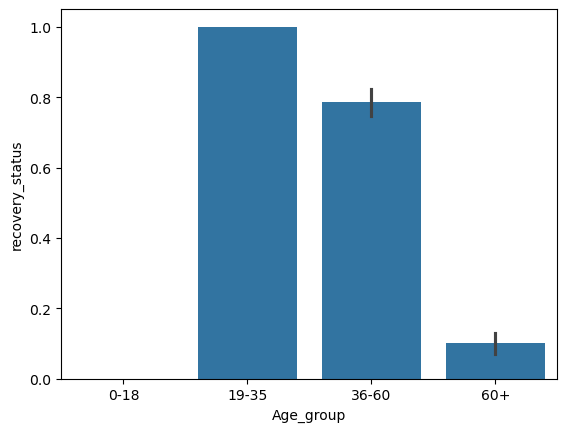

In [33]:
sns.barplot(data=df, x='Age_group', y='recovery_status')
plt.show()

# Distribution of medical expenses (outliers?)

In [34]:
df.head()

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction,Age_group,recovery_status
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4,36-60,1
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3,36-60,0
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5,19-35,1
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2,60+,0
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4,36-60,1


In [35]:
df["Cost"].describe()

count      984.000000
mean      8367.479675
std       7761.990976
min        100.000000
25%       1000.000000
50%       6000.000000
75%      15000.000000
max      25000.000000
Name: Cost, dtype: float64

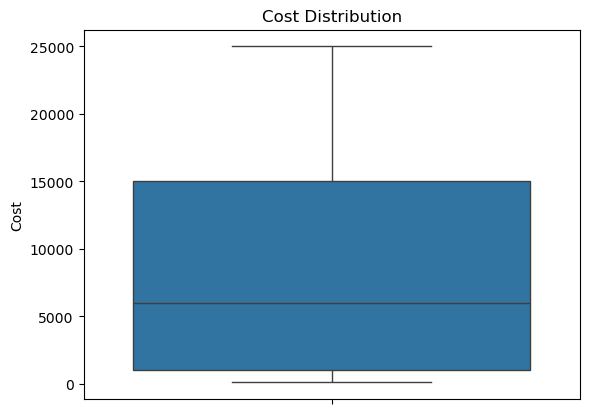

In [36]:
sns.boxplot(y=df['Cost'])
plt.title("Cost Distribution")
plt.show()


# Average expense per disease

In [37]:
df.groupby("Condition")["Cost"].mean().sort_values(ascending=False)

Condition
Cancer                   25000.0
Prostate Cancer          20000.0
Heart Attack             18000.0
Heart Disease            15000.0
Childbirth               12000.0
Stroke                   10000.0
Appendicitis              8000.0
Kidney Stones             6000.0
Osteoarthritis            4000.0
Fractured Leg             3000.0
Diabetes                  2000.0
Hypertension              1000.0
Respiratory Infection      800.0
Fractured Arm              500.0
Allergic Reaction          100.0
Name: Cost, dtype: float64

# Average expense per treatment

In [38]:
df.groupby("Procedure")['Cost'].mean().sort_values(ascending=False)

Procedure
Surgery and Chemotherapy                25000.0
Radiation Therapy                       20000.0
Cardiac Catheterization                 18000.0
Angioplasty                             15000.0
Delivery and Postnatal Care             12000.0
CT Scan and Medication                  10000.0
Appendectomy                             8000.0
Lithotripsy                              6000.0
Physical Therapy and Pain Management     4000.0
Cast and Physical Therapy                3000.0
Insulin Therapy                          2000.0
Medication and Counseling                1000.0
Antibiotics and Rest                      800.0
X-Ray and Splint                          500.0
Epinephrine Injection                     100.0
Name: Cost, dtype: float64

In [39]:
avg_cost_df = avg_cost.reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_cost_df,
    x="Procedure",
    y="Cost"
)
plt.xticks(rotation=45)
plt.title("Average Cost per Procedure")
plt.show()


NameError: name 'avg_cost' is not defined

# Are recovered patients cheaper than non-recovered ones?

In [ ]:
df.head()

In [ ]:
df.groupby('recovery_status')['Cost'].mean()

# Which disease has high cost but low recovery? (🚨 red flag)

In [43]:
avg_sum = df.groupby("Condition").agg(
    high_cost = ("Cost","sum"),
    reco_rate = ('recovery_status','mean')
)
avg_sum.sort_values(["high_cost","reco_rate"], ascending=[False,True]).head()

,high_cost,reco_rate
Condition,,
Cancer,1650000,1.0
Prostate Cancer,1300000,1.0
Heart Attack,1206000,0.0
Heart Disease,975000,1.0
Childbirth,780000,1.0


# For the same disease, which treatment performs better?

In [44]:
df.head()

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction,Age_group,recovery_status
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4,36-60,1
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3,36-60,0
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5,19-35,1
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2,60+,0
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4,36-60,1


In [53]:
df.groupby(['Condition','Procedure'])['recovery_status'].mean().reset_index()

,Condition,Procedure,recovery_status
0,Allergic Reaction,Epinephrine Injection,1.0
1,Appendicitis,Appendectomy,1.0
2,Cancer,Surgery and Chemotherapy,1.0
3,Childbirth,Delivery and Postnatal Care,1.0
4,Diabetes,Insulin Therapy,0.0
5,Fractured Arm,X-Ray and Splint,1.0
6,Fractured Leg,Cast and Physical Therapy,1.0
7,Heart Attack,Cardiac Catheterization,0.0
8,Heart Disease,Angioplasty,1.0
9,Hypertension,Medication and Counseling,0.0


In [54]:
df['recovery_status'] = (df['Outcome'] == 'Recovered').astype(int)
result = (
    df.groupby(['Condition', 'Procedure'])['recovery_status']
      .mean()
      .reset_index()
)
result

,Condition,Procedure,recovery_status
0,Allergic Reaction,Epinephrine Injection,1.0
1,Appendicitis,Appendectomy,1.0
2,Cancer,Surgery and Chemotherapy,1.0
3,Childbirth,Delivery and Postnatal Care,1.0
4,Diabetes,Insulin Therapy,0.0
5,Fractured Arm,X-Ray and Splint,1.0
6,Fractured Leg,Cast and Physical Therapy,1.0
7,Heart Attack,Cardiac Catheterization,0.0
8,Heart Disease,Angioplasty,1.0
9,Hypertension,Medication and Counseling,0.0


# Does longer hospital stay increase recovery probability?

In [55]:
df.head()

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction,Age_group,recovery_status
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4,36-60,1
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3,36-60,0
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5,19-35,1
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2,60+,0
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4,36-60,1


In [57]:
df['Length_of_Stay'].

0      False
1      False
2      False
3      False
4      False
       ...  
979     True
980     True
981     True
982     True
983     True
Name: Length_of_Stay, Length: 984, dtype: bool

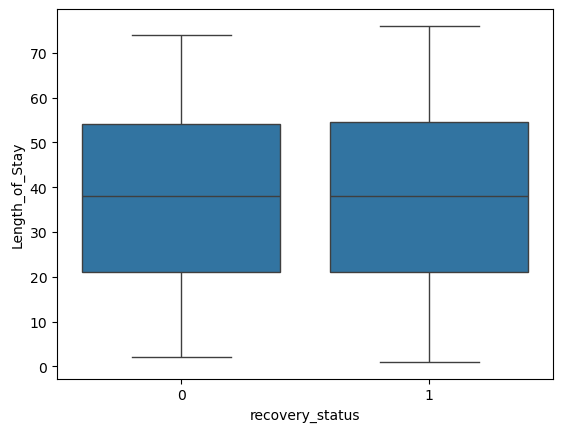

In [58]:
sns.boxplot(data=df, x='recovery_status', y='Length_of_Stay')
plt.show()

In [59]:
df[['Cost','recovery_status']].corr()

,Cost,recovery_status
Cost,1.00000,0.24564
recovery_status,0.24564,1.00000
